# Plotting radial hydrogen orbitals with sympy
This notebook, loosely inspired on https://ojensen.wordpress.com/2010/08/10/fast-ufunc-ish-hydrogen-solutions/, plots some radial hydrogen functions using sympy, as support for Chapter 2 of the Building Blocks of Matter course at Leiden University.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sympy.physics.hydrogen import R_nl
from sympy import var
from sympy import init_printing
from sympy.utilities.lambdify import lambdify
from sympy import integrate, oo
from scipy.constants import hbar, alpha, Rydberg, c

init_printing()

plt.rcParams['axes.xmargin'] = 0
plt.rcParams['figure.figsize'] = [8,6]

cmap = matplotlib.cm.get_cmap('tab20c')

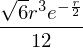

In [6]:
var('n l r')
R_nl(2,1,r,1)*r**2

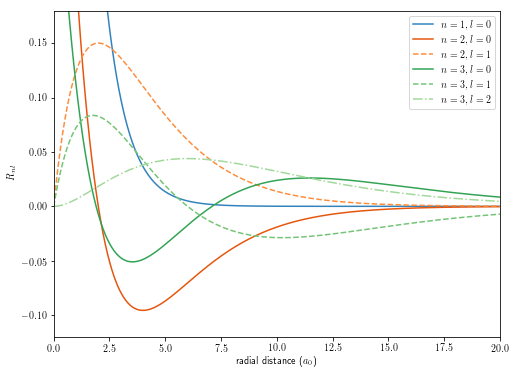

In [7]:
x_np = np.linspace(0, 20, 200)
linestyles = ['-', '--', '-.', ':']

Z = 1

for n_np in range(1,4):
    for l_np in range(0,n_np):
        plt.plot(x_np,lambdify(r, R_nl(n_np, l_np, r, Z))(x_np), 
                 color=cmap(4*n_np-4+l_np),
                 linestyle=linestyles[l_np],
                 label="$n = {}, l = {}$".format(n_np, l_np))
plt.ylim([-0.12, 0.18])
plt.xlabel('radial distance ($a_0$)')
plt.ylabel('$R_{nl}$')
plt.legend()
plt.show()

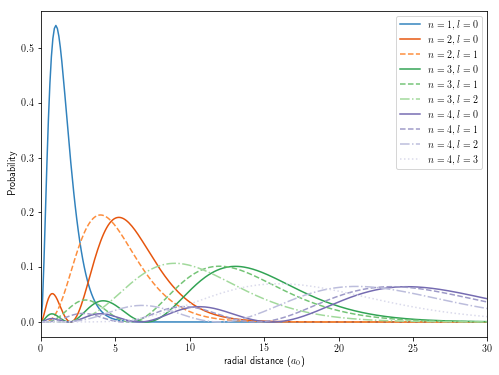

In [8]:
x_np = np.linspace(0, 30, 300)
for n_np in range(1,5):
    for l_np in range(0,n_np):
        expected_r = integrate(r * R_nl(n_np, l_np, r, 1)**2 * r**2, (r,0,oo))
        plt.plot(x_np, lambdify(r, R_nl(n_np, l_np, r, 1)**2 * r**2)(x_np), 
                 color=cmap(4*(n_np-1) + l_np),
                 linestyle=linestyles[l_np],
                 label="$n = {}, l = {}, \langle r \rangle = {}$".format(n_np, 
                                                                           l_np,
                                                                           expected_r))
plt.xlabel('radial distance ($a_0$)')
plt.ylabel('Probability')
plt.legend()
plt.show()